In [1]:
import numpy as np
import pandas as pd
from math import *
import yfinance as yf
from scipy.stats import norm


r = 0.0137    #Risk free rate en tanto por uno
K = 240      #Strike
T = 1        #Tiempo a vencimiento

assets = ['TSLA']
data = pd.DataFrame()
data = yf.download(assets, start='2013-1-1', end = '2021-1-1')['Adj Close']

S = data.iloc[-1]

log_returns = np.log(1+data.pct_change())
Vol = log_returns.std() * 252 **0.5

def d1(S, K, r, Vol, T):
    return (np.log(S/K) + ((r + (Vol**2)/2) * T)) / (Vol * np.sqrt(T))
            
def d2(S, K, r, Vol, T):
    return (d1(S, K, r, Vol, T)-Vol * np.sqrt(T))

def BSMCall(S, K, r, Vol, T):
    d_uno = d1(S, K, r, Vol, T)
    d_dos = d2(S, K, r, Vol, T)
    return (S*norm.cdf(d_uno)) - (K*np.exp(-r*T)*norm.cdf(d_dos))

def BSMPut(S, K, r, Vol, T):
    d_uno = d1(S, K, r, Vol, T)
    d_dos = d2(S, K, r, Vol, T)
    return (K*np.exp(-r*T)*norm.cdf(-d_dos)) - (S*norm.cdf(-d_uno))

[*********************100%%**********************]  1 of 1 completed


In [2]:
BSMCall(S, K, r, Vol, T)

51.09548394621335

In [3]:
BSMPut(S, K, r, Vol, T)

52.60657660668693

In [4]:
S

235.22332763671875

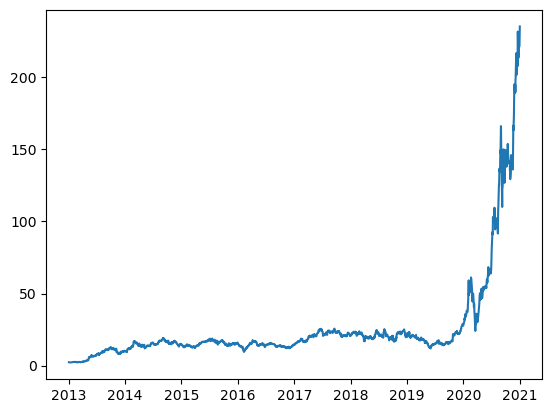

In [5]:
import matplotlib.pyplot as plt
plt.plot(data)

In [6]:
def BSMCallGreeks(S, K, r, Vol, T):
    d_uno = d1(S, K, r, Vol, T)
    d_dos = d2(S, K, r, Vol, T)
    Delta = norm.cdf(d_uno)
    Gamma = norm.pdf(d_uno)/(S*Vol*sqrt(T))
    Theta = -(S*Vol*norm.pdf(d_uno))/(2*sqrt(T)) - r*K*exp( -r*T)*norm.cdf(d_dos)
    Vega = S *sqrt(T)*norm.pdf(d_uno)
    Rho = K*T*exp(-r*T)*norm.cdf(d_dos)
    return Delta, Gamma, Theta, Vega , Rho

In [7]:
def BSMPutGreeks(S, K, r, Vol, T):
    d_uno = d1(S, K, r, Vol, T)
    d_dos = d2(S, K, r, Vol, T)
    Delta = norm.cdf(-d_uno)
    Gamma = norm.pdf(d_uno)/(S*Vol*sqrt(T))
    Theta = -(S*Vol*norm.pdf(d_uno)) / (2*sqrt(T))+ r*K * exp(-r*T) * norm.cdf(-d_uno)
    Vega = S *sqrt(T) * norm.pdf(d_uno)
    Rho = -K*T*exp(-r*T) * norm.cdf(-d_dos)
    return Delta, Gamma, Theta, Vega, Rho

In [8]:
BSMCallGreeks(S, K, r, Vol, T)

(0.6054453293916435,
 0.002933228694636189,
 -26.507700152985485,
 90.54323445805481,
 91.31938113539833)

In [9]:
BSMPutGreeks(S, K, r, Vol, T)

(0.3945546706083564,
 0.002933228694636189,
 -23.97698063568887,
 90.54323445805481,
 -145.415039161794)